In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from src.data_processing import load_data, clean_data, map_ip_to_country, engineer_features
from src.model_utils import prepare_for_modeling, handle_imbalance_smote
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and clean
fraud_df = clean_data(load_data('../data/raw/Fraud_Data.csv'))
ip_df = load_data('../data/raw/IpAddress_to_Country.csv')

# Apply Geolocation and Engineering from your SRC
df = map_ip_to_country(fraud_df, ip_df)
df = engineer_features(df)

# VISIBLE CHECK: Show the new columns
print(df[['signup_time', 'purchase_time', 'time_since_signup', 'device_usage_count']].head())

INFO: Successfully loaded ../data/raw/Fraud_Data.csv
INFO: Removed 0 duplicate rows.
INFO: Successfully loaded ../data/raw/IpAddress_to_Country.csv


          signup_time       purchase_time  time_since_signup  \
0 2015-02-16 00:17:05 2015-03-08 10:00:39          1763014.0   
1 2015-03-08 04:03:22 2015-03-20 17:23:45          1084823.0   
2 2015-05-17 16:45:54 2015-05-26 08:54:34           749320.0   
3 2015-03-03 19:58:39 2015-05-28 21:09:13          7434634.0   
4 2015-03-20 00:31:27 2015-04-05 07:31:46          1407619.0   

   device_usage_count  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


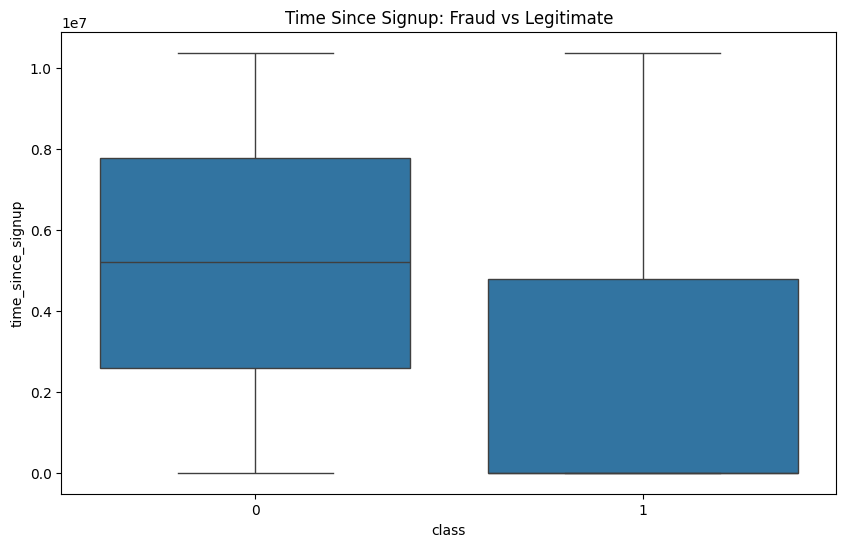

In [3]:
# Is 'time_since_signup' actually useful? 
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='time_since_signup', data=df)
plt.title('Time Since Signup: Fraud vs Legitimate')
plt.show()
# Logic: If the boxplot shows Fraud has a much lower time, the feature is successful!

In [4]:
# Prepare for modeling (Encoding strings to numbers)
X_train, X_test, y_train, y_test = prepare_for_modeling(df, 'class')

# Apply SMOTE
X_resampled, y_resampled = handle_imbalance_smote(X_train, y_train)

# VISIBLE VERIFICATION
import pandas as pd
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

INFO: Before SMOTE: {0: 109568, 1: 11321}
INFO: After SMOTE: {0: 109568, 1: 109568}


Before SMOTE: class
0    109568
1     11321
Name: count, dtype: int64
After SMOTE: class
0    109568
1    109568
Name: count, dtype: int64
